<a href="https://colab.research.google.com/github/tianiachan/IdentifyingAirBnBsinSantaClara/blob/main/Data670_Identifying_AirBnBs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#upload necessary csv to google drive 
from google.colab import files
uploaded = files.upload()

Saving calendarMod.csv to calendarMod.csv
Saving listingsMod.csv to listingsMod.csv
Saving reviewMod.csv to reviewMod.csv


In [2]:
# #shortcutting for troubleshooting ML
# #import as dataframe 
import pandas as pd
import io
import matplotlib.pyplot as plt
listings_df = pd.read_csv('/content/listingsMod.csv')
calendar_df = pd.read_csv('/content/calendarMod.csv')
reviews_df = pd.read_csv('/content/reviewMod.csv')

In [ ]:
# #import as dataframe 
# import pandas as pd
# import io
# listings_df = pd.read_csv('/content/listings.csv')
# calendar_df = pd.read_csv('/content/calendar.csv')
# reviews_df = pd.read_csv('/content/reviews.csv')

# Step by Step EDA in Python https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee

In [ ]:
#drop columns not needed for listings
listings_df.columns
listings_df=listings_df.drop(columns=['host_id','host_name','neighbourhood_group','price','minimum_nights','number_of_reviews','last_review','reviews_per_month','availability_365','number_of_reviews_ltm'])

In [ ]:
#rename id column to listing id to join later
listings_df.rename(columns={'id':'listing_id'}, inplace=True)

In [ ]:
listings_df.head()

,Unnamed: 0,listing_id,name,neighbourhood,latitude,longitude,room_type,calculated_host_listings_count,license
0,0,2861174.0,Casablanca Master Suite,Palo Alto,37.41710,-122.12669,Private room,1,NaN
1,1,1364787.0,Iris House Cozy room in dwntn Palo Alto & Stan...,Palo Alto,37.44973,-122.15081,Private room,5,NaN
2,2,2880487.0,**Premium Executive Condo. with Maid Svcs**,Los Altos,37.37318,-122.10736,Entire home/apt,1,NaN
3,3,1366049.0,Beautiful Single Family Home,Campbell,37.26901,-121.96325,Private room,1,NaN
4,4,4952.0,Butterfly Inn near Stanford with weekly cleaning,Palo Alto,37.43932,-122.15741,Private room,5,NaN


In [ ]:
#same for reviews
reviews_df.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [ ]:
#drop the columns
reviews_df=reviews_df.drop(columns=['reviewer_id'])

In [ ]:
reviews_df.head()

,listing_id,id,date,reviewer_name,comments
0,4952,6560,2009-08-02,Diane,Staying with Mei Lin and Ross at the Butterfly...
1,1353178,7471795,2013-09-21,Jesus,I will definitely stay at HackerHome when I go...
2,1353178,10120145,2014-02-01,Jeanne,Rob and Vic = family.\r<br/>Class acts.
3,1353178,11096627,2014-03-20,Debora,"Very nice place, nice people, nice location! I..."
4,1353178,11875945,2014-04-17,Pascal,I had a really good time in the HackerHome. Ev...


In [ ]:
#rename column id so it says review id
reviews_df.rename(columns={'id':'review_id'}, inplace=True)

In [ ]:
#check that changes happened
reviews_df.head()

,listing_id,review_id,date,reviewer_name,comments
0,4952,6560,2009-08-02,Diane,Staying with Mei Lin and Ross at the Butterfly...
1,1353178,7471795,2013-09-21,Jesus,I will definitely stay at HackerHome when I go...
2,1353178,10120145,2014-02-01,Jeanne,Rob and Vic = family.\r<br/>Class acts.
3,1353178,11096627,2014-03-20,Debora,"Very nice place, nice people, nice location! I..."
4,1353178,11875945,2014-04-17,Pascal,I had a really good time in the HackerHome. Ev...


In [ ]:
#do the same for calendar
calendar_df.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')

In [ ]:
calendar_df=calendar_df.drop(columns=['price','adjusted_price','minimum_nights','maximum_nights'])

In [ ]:
#exploratory statistics on each dataset
listings_df.describe()

,listing_id,latitude,longitude,calculated_host_listings_count
count,6.162000e+03,6162.000000,6162.000000,6162.000000
mean,2.086868e+17,37.346771,-121.961575,54.354755
std,3.186442e+17,0.066625,0.111997,130.668417
min,4.952000e+03,36.965600,-122.196520,1.000000
25%,2.599622e+07,37.317750,-122.039510,1.000000
50%,4.625849e+07,37.348895,-121.951896,3.000000
75%,6.028115e+17,37.394208,-121.885593,13.000000
max,7.901690e+17,37.462000,-121.380120,461.000000


In [ ]:
##paired with datatype and identification of null values
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6162 entries, 0 to 6161
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   listing_id                      6162 non-null   float64
 1   name                            6161 non-null   object 
 2   neighbourhood                   6162 non-null   object 
 3   latitude                        6162 non-null   float64
 4   longitude                       6162 non-null   float64
 5   room_type                       6162 non-null   object 
 6   calculated_host_listings_count  6162 non-null   int64  
 7   license                         258 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 385.2+ KB


In [ ]:
#remove duplicates
listings_df = listings_df.drop_duplicates(subset = ['listing_id'])

In [ ]:
#finally check for any duplicates?
listings_df.duplicated().sum()

0

In [ ]:
reviews_df.describe() #no staistical value since the rest are boolean or string

,listing_id,review_id
count,1.966170e+05,1.966170e+05
mean,2.610696e+16,2.208022e+17
std,1.263996e+17,2.991275e+17
min,4.952000e+03,6.560000e+03
25%,1.101710e+07,3.223056e+08
50%,2.215150e+07,6.068444e+08
75%,3.818878e+07,5.363594e+17
max,7.803523e+17,7.907592e+17


In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196617 entries, 0 to 196616
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     196617 non-null  int64 
 1   review_id      196617 non-null  int64 
 2   date           196617 non-null  object
 3   reviewer_name  196616 non-null  object
 4   comments       196564 non-null  object
dtypes: int64(2), object(3)
memory usage: 7.5+ MB


In [ ]:
reviews_df.duplicated().sum()

0

In [ ]:
calendar_df.describe()

,listing_id
count,2.249130e+06
mean,2.086868e+17
std,3.186184e+17
min,4.952000e+03
25%,2.598223e+07
50%,4.625849e+07
75%,6.028160e+17
max,7.901690e+17


In [ ]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249130 entries, 0 to 2249129
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   listing_id  int64 
 1   date        object
 2   available   object
dtypes: int64(1), object(2)
memory usage: 51.5+ MB


In [ ]:
calendar_df.duplicated().sum()

0

# SECTION FOR NOTES, DO NOT USE


In [ ]:
#concentrate on the text cleaning now
#takenfrom https://www.analyticsvidhya.com/blog/2022/01/text-cleaning-methods-in-nlp/
#lowercaseing the data, need as type str so that it processes as string even though datatype is object
reviews_df['comments'] = reviews_df['comments'].astype('str').apply(str.lower)

In [ ]:
#test dataframe for testing methods before executing on reviews_df
#reviews_test = reviews_df.copy()

In [ ]:
#preview the changes
#reviews_test.head(20)

In [ ]:
#remove the <br/> from the reviews
reviews_df['comments'] = reviews_df['comments'].str.replace('<br/>','')

In [ ]:
#get rid of the \r
reviews_df['comments'] = reviews_df['comments'].str.replace('\r','')

In [ ]:
#remove punctuation
import string
#method
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
#removal from column
reviews_df['comments'] = reviews_df['comments'].astype('str').apply(remove_punctuations)

In [ ]:
#remove numbers
reviews_df['comments'] = reviews_df['comments'].str.replace('\d+', '')

<ipython-input-28-ff7a0831e770>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews_df['comments'] = reviews_df['comments'].str.replace('\d+', '')


In [ ]:
#remove extra spaces
reviews_df['comments'] = reviews_df['comments'].str.strip()

In [ ]:
#remove emojis
import re
#method and library needed to remove emojis
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"U0001F600-U0001F64F"  # emoticons
                           u"U0001F300-U0001F5FF"  # symbols & pictographs
                           u"U0001F680-U0001F6FF"  # transport & map symbols
                           u"U0001F1E0-U0001F1FF"  # flags (iOS)
                           u"U00002702-U000027B0"
                           u"U000024C2-U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [ ]:
# actual removal
reviews_df['comments'] = reviews_df['comments'].astype('str').apply(remove_emoji)

In [ ]:
#run this each new run then comment it out
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#remove contractions
#pip install library and the method to remove contractions
import contractions
#empty list for expanded text
def remove_contractions(text):
  return contractions.fix(text)

In [ ]:
#actually remove
reviews_df['comments'] = reviews_df['comments'].astype('str').apply(remove_contractions)

In [ ]:
#remove stopwords, tokenize and create a wordcloud with the words that are most frequent.. later
import nltk
nltk.download('all')
import wordcloud
from nltk import sent_tokenize as st
from nltk import word_tokenize as wt
from nltk.probability import FreqDist as fd
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data]    |   Unzipping corpora/ycoe.zip.
[nltk_data]    | 
[nltk_data]  Done downloading collection all


In [ ]:
#remove stop words and words that are only one character long
#reviews_df['comments'] = reviews_df['comments'].astype('str').apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

#reviews_df['comments'] = reviews_df['comments'].astype('str').apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words) and len(word) != 1]))

# Import to csv

In [ ]:
##print to csv for use in tableau and SAS Enterprise Miner
reviews_df.to_csv("reviewMod.csv")

In [ ]:
listings_df.to_csv("listingsMod.csv")

In [ ]:
calendar_df.to_csv("calendarMod.csv")

# DON'T USE FROM HERE - EXPANDING ON WORD CLOUD TO BE CONTINUED

In [ ]:
#since there are nulls, lets drop them for the word cloud but make copy of dataframe so itdoesnt affect the actual one used for processing
review_copy = reviews_df.copy()

In [ ]:
#drop nulls
review_copy = review_copy.dropna()

In [ ]:
#check the nulls were dropped
review_copy.comments.isnull().values.any()

False

In [ ]:
#get frequency of each word?
#first turn into string
commentStr = ' '.join(review_copy['comments'])


In [ ]:
# https://www.guru99.com/tokenize-words-sentences-nltk.html -- tokenize sentence if wat to see average word per sentence
#how to https://www.geeksforgeeks.org/introduction-to-nltk-tokenization-stemming-lemmatization-pos-tagging/
#then tokenize for sentence (in case) and words
sent_comment = st(commentStr)

In [ ]:
type(sent_comment)

list

In [ ]:
#for words
word_comment = wt(commentStr)

In [ ]:
type(word_comment)

list

In [ ]:
#test the contents
#for i in range(5):
#  print(word_comment[i])

staying
mei
lin
ross
butterfly


In [ ]:
##convert to string for lemmatization
# convert from array of strings to a giant string
wordStr = ' '.join(word_comment)

In [ ]:
#lemmatize to get similiar words together versus stemming which can just cut words shorter Ex: 'play', 'plays', 'played', and 'playing' have 'play' as the lemma. 
from nltk.stem import WordNetLemmatizer
wclemmatizer = WordNetLemmatizer()

wcwordLemmatized = wclemmatizer.lemmatize(wordStr)

In [ ]:
#put back into array so can be iterized for word frequency

lemmatized_array = wcwordLemmatized.split()


In [ ]:
#get frequency
word_freq = fd(lemmatized_array)

In [ ]:
#word_freq

FreqDist({'place': 98569, 'great': 97784, 'stay': 95070, 'clean': 61479, 'nice': 43767, 'location': 43171, 'host': 40182, 'would': 39714, 'house': 36411, 'comfortable': 35997, ...})

In [ ]:
# countOne = 0
# for word in word_freq:
#   if len(word) == 1:
#     countOne += 1
# print(countOne)

23


In [ ]:
word_freq.most_common(30)

[('place', 98569),
 ('great', 97783),
 ('stay', 95070),
 ('clean', 61479),
 ('nice', 43766),
 ('location', 43171),
 ('host', 40182),
 ('would', 39714),
 ('house', 36411),
 ('comfortable', 35997),
 ('room', 30002),
 ('home', 29825),
 ('everything', 27759),
 ('recommend', 26835),
 ('quiet', 25949),
 ('definitely', 24199),
 ('good', 22187),
 ('perfect', 21737),
 ('easy', 21647),
 ('area', 21095),
 ('well', 21069),
 ('really', 19639),
 ('space', 19375),
 ('time', 18349),
 ('beautiful', 18198),
 ('us', 17486),
 ('super', 17394),
 ('close', 16572),
 ('neighborhood', 16458),
 ('also', 15371)]

In [ ]:
#create wordcloud
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Continue Executing Here

In [3]:
# https://www.datacamp.com/tutorial/text-analytics-beginners-nltk
# https://realpython.com/python-keras-text-classification/
# https://stackabuse.com/text-classification-with-python-and-scikit-learn/
import numpy as np
import re

In [4]:
#rename id column in listings df to listing id so that can merge
listings_df.rename(columns={'id':'listing_id'}, inplace=True)

In [5]:
listings_df.columns

Index(['Unnamed: 0', 'listing_id', 'name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'calculated_host_listings_count', 'license'],
      dtype='object')

In [6]:
reviews_df.columns

Index(['Unnamed: 0', 'listing_id', 'review_id', 'date', 'reviewer_name',
       'comments'],
      dtype='object')

In [7]:
#join reviews and listings together to get apartment (target variable) and comments ( our data to extract keywords from)
merged_df = listings_df.merge(reviews_df, on = 'listing_id', how = 'inner')

In [8]:
merged_df.shape # listing 6148 review 196617 merged 188499 - inner merged right 196617

(188499, 14)

In [11]:
merged_df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

# Troubleshooting merged dataframe

In [ ]:
#get a sample of 60% of dataframe, random state is like set seed in r
#merged_df60 = merged_df.sample(frac=0.6, random_state = 5)

In [ ]:
#merged_df60.head()

In [ ]:
#merged_df60.shape

In [ ]:
#merged_df60.comments.isnull().values.any()

In [ ]:
#merged_df60.duplicated().sum() #we are good so go back to using the whole dataframe

# Continue after troubleshooting

In [12]:
# define variables containing the data and  target variable
x, y = merged_df.comments, merged_df.room_type

In [14]:
y.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [15]:
#need to split and lemmatize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('all')
import re
import numpy as np
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()
documents = []


#clean and lemmatize to create documents
for sen in range(0, len(x)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(x[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [lemmatizer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [16]:
#convert text to numbers for ML algorithms using Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
#each unique word is converted to a feature so when limiting to 1500, that helps get rid of those with a low frequency
# min  df is minimum number of documents containing the feature
vectorizer = CountVectorizer(analyzer="word", max_features=1500, min_df=1, max_df = .7, stop_words=stopwords.words('english'))

#apply to x and transform the documents into numeric features using fit transform
x = vectorizer.fit_transform(documents).toarray()

In [17]:
type(vectorizer)

sklearn.feature_extraction.text.CountVectorizer

In [18]:
x.shape

(188499, 1500)

In [19]:
#find if there are nulls in numpy  array
def findNulls(data):
  return np.count_nonzero(np.isnan(data))

In [20]:
findNulls(x) 

0

In [21]:
#create tfidf from bag of words aka inverse document frequency = log( total # of ducoments/ # of documents containing word)
from sklearn.feature_extraction.text import TfidfTransformer
tdidfconverter = TfidfTransformer()

#now convert
x = tdidfconverter.fit_transform(x).toarray()

In [22]:
#split into training and testing
from sklearn.model_selection import train_test_split
#random state sets the seed and test size is a percentage so this is 20 80 split
# x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 5)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 5)

<Axes: >

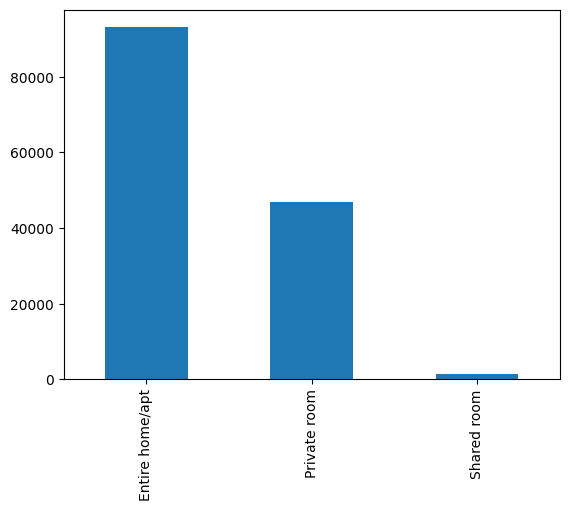

In [23]:
#check to see if target variable is balanced enough
# https://towardsdatascience.com/machine-learning-target-feature-label-imbalance-problem-and-solutions-98c5ae89ad0
y_train.value_counts().plot(kind = 'bar')
#entire home/apt is the most but need to balance to make models more accurate, since data set is huge, delete rows to make more balanced this time

In [24]:
y_train.value_counts()

Entire home/apt    93145
Private room       46971
Shared room         1258
Name: room_type, dtype: int64

In [25]:
y_test.value_counts()

Entire home/apt    30939
Private room       15761
Shared room          425
Name: room_type, dtype: int64

In [26]:
#'delete' to balance the data, there are other methods but those would increase the size of the dataset slowing down the algorithms even more
from imblearn.datasets import make_imbalance
#save in different variables to be able to compare
x_train_1, y_train_1 = make_imbalance(x_train, y_train, sampling_strategy={'Entire home/apt': 1200, 'Private room': 1200, 'Shared room': 1200},random_state=5)
x_test_1, y_test_1 = make_imbalance(x_test, y_test, sampling_strategy={'Entire home/apt': 425, 'Private room': 425, 'Shared room': 425},random_state=5)

In [27]:
y_train_1.value_counts()

Entire home/apt    1200
Private room       1200
Shared room        1200
Name: room_type, dtype: int64

In [28]:
y_test_1.value_counts()

Entire home/apt    425
Private room       425
Shared room        425
Name: room_type, dtype: int64

In [29]:
findNulls(x_train) # sweet there are none

0

In [30]:
x_train.shape

(141374, 1500)

# Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
# https://corporatefinanceinstitute.com/resources/data-science/random-forest/#:~:text=Among%20all%20the%20available%20classification,other%20classes%20in%20the%20data.
# https://stackabuse.com/text-classification-with-python-and-scikit-learn/
rfclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 5)
rfclassifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=5)

In [33]:
#libraries for evaluation metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score

In [34]:
#get predictions from the model
y_pred = rfclassifier.predict(x_test)

In [35]:
#accuracy
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.7473103448275862


In [36]:
#precision
precision = precision_score (y_test, y_pred, average = "micro")
print(precision)

0.7473103448275862


In [37]:
#recall
recall = recall_score(y_test, y_pred, average = "micro")
print(recall)

0.7473103448275862


In [38]:
#f1 score
f1 = f1_score (y_test,y_pred, average = "micro")
print(f1)

0.7473103448275862


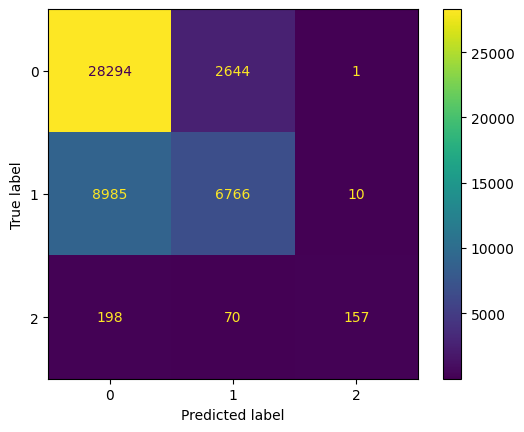

In [39]:
#confusion matrix
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix = cm).plot()

# Sort words by frequency

In [40]:
#get feature names
vocam = vectorizer.get_feature_names_out()
print(f"Printing first 100 words: \n{vocam[:100]}")

Printing first 100 words: 
['able' 'absolute' 'absolutely' 'ac' 'access' 'accessible' 'accommodate'
 'accommodated' 'accommodating' 'accommodation' 'accomodating' 'accurate'
 'across' 'activity' 'actual' 'actually' 'add' 'added' 'addition'
 'additional' 'address' 'adequate' 'adorable' 'adult' 'advantage'
 'advertised' 'advice' 'affordable' 'afternoon' 'air' 'airbnb' 'airbnbs'
 'airport' 'alex' 'ali' 'allow' 'allowed' 'allowing' 'almost' 'alone'
 'along' 'already' 'also' 'although' 'alto' 'always' 'amazing' 'amazingly'
 'amenity' 'amount' 'ample' 'amy' 'ana' 'angela' 'animal' 'ann' 'anna'
 'anne' 'annie' 'another' 'answer' 'answered' 'ant' 'anthony' 'antonio'
 'anyone' 'anything' 'anytime' 'anywhere' 'apartment' 'app' 'apple'
 'appliance' 'appointed' 'appreciate' 'appreciated' 'april' 'apt' 'area'
 'around' 'arrangement' 'arrival' 'arrive' 'arrived' 'arriving' 'art'
 'ask' 'asked' 'asking' 'atmosphere' 'attached' 'attending' 'attention'
 'attentive' 'attraction' 'automated' 'available' 

In [41]:
type(vocam)

numpy.ndarray

In [42]:
#get distribution
distribution = np.sum(x_train,axis=0)

In [72]:
print(f"Printing first 100 words: \n{distribution[:100]}")

Printing first 100 words: 
[ 525.2442685    97.16044307  762.05597431  322.41542115  877.428822
  235.42741715  162.78558428  132.26904782 1246.36959363  552.18187694
   78.94875412  339.62509757  206.92493708  111.07019897   47.36424687
  157.38923618   81.5022936   142.3165636   102.37816802   79.17718327
   58.58683393   62.90292952  224.36684113  107.58608117   52.58523636
  582.85141938   61.5292016   285.15988996   45.90449737  386.48002981
 1405.40462455  132.68532362  371.42219548  123.1876976    88.92407383
   48.68020055  132.23869507   55.44810045  203.97686058   87.69214267
  141.4173113   177.42565361 1471.68460738  207.25110986 1017.58234628
 1239.58281574 2323.26487736   83.56983547 1495.30639837  118.66870608
  129.66202645  123.96655758   91.45901425   89.43178848  168.17008753
  131.24317598  100.48856701  120.76710223   88.1946385   558.35681483
  161.41734371  145.98382737   58.68891646   96.06627524   75.49587393
  715.58246862  448.85349799  108.94582677  125.9711

In [71]:
type(distribution)

numpy.ndarray

In [73]:
#zip together to get word with distribution
countofInstances = zip(vocam, distribution)


In [68]:
type(countofInstances)

zip

In [69]:
#sort  from most used to least used
wordSorted = sorted(countofInstances, key = lambda x: x[1])

In [74]:
# https://stackoverflow.com/questions/7142227/how-do-i-sort-a-zipped-list-in-python
for name, importance in sorted(zip(vocam, 
                distribution),key=lambda x: x[1]):
    print(name, importance)

counter 35.241266526294055
cabinet 35.2982247591888
stain 35.580942822522196
saying 37.48656013218285
finally 37.517447077054534
understand 38.000702176475016
shoe 38.24523371053735
drawer 38.3673345548655
messaged 39.85908945936547
toaster 40.519230666615606
double 40.658443705048526
hallway 40.79506219457886
noticed 41.15535290630549
blind 41.18113162609918
bringing 41.236282656746425
kettle 41.24828075065964
asking 41.45999066102651
opening 42.143094135725036
started 42.15394021271123
contacted 42.3829980750004
picked 42.681875979756825
sign 42.84108017391295
pro 42.865733829826446
degree 42.97958679213552
requested 43.12534798635482
portable 44.10946395607772
carpet 44.36035738667618
white 44.61497529340313
changed 44.63371012186373
juice 44.85601617902851
pit 44.88819930462836
charge 45.19715059329919
rain 45.389003465641714
idea 45.427571005969504
opened 45.5244873102932
ran 45.58924727656544
sort 45.898319907894525
afternoon 45.904497369906046
matter 46.29357322301038
speed 46.4

# Random Forest Continued

In [ ]:
#using balanced variables
rfclassifier_balanced = RandomForestClassifier(n_estimators = 1000, random_state = 5)
rfclassifier_balanced.fit(x_train_1,y_train_1)

RandomForestClassifier(n_estimators=1000, random_state=5)

In [ ]:
#evaluate
#get predictions from the model
y_pred_RFCBalanced = rfclassifier_balanced.predict(x_test_1)

In [ ]:
# fixing value error target is multiclass butaverage = 'binary'
# https://stackoverflow.com/questions/52269187/facing-valueerror-target-is-multiclass-but-average-binary
#accuracy
accuracyRFB = accuracy_score(y_test_1,y_pred_RFCBalanced)
#precision
precisionRFB = precision_score (y_test_1, y_pred_RFCBalanced, average = "micro")
#recall
recallRFB = recall_score(y_test_1, y_pred_RFCBalanced, average = "micro")
#f1 score
f1RFB = f1_score (y_test_1,y_pred_RFCBalanced, average = "micro")
print("F1 Score:", f1RFB)
print("Recall:", recallRFB)
print("Precision:",  precisionRFB)
print("Accuracy:", accuracyRFB)

F1 Score: 0.6447058823529411
Recall: 0.6447058823529411
Precision: 0.6447058823529411
Accuracy: 0.6447058823529411


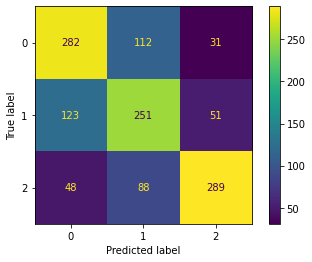

In [ ]:
#confusion matrix
cmRFB = confusion_matrix(y_test_1,y_pred_RFCBalanced)
ConfusionMatrixDisplay(confusion_matrix = cmRFB).plot()

#RF visualization for ideal model

In [76]:
# https://towardsdatascience.com/4-ways-to-visualize-individual-decision-trees-in-a-random-forest-7a9beda1d1b7
#visualize the tree
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [82]:
#size of plot
fig = plt.figure(figsize=(160,100))
# plot_tree(rfclassifier.estimators_[5], feature_names = x.columns, cfilled=True);
# plot_tree(rfclassifier.estimators_[5],feature_names = vectorizer.get_feature_names_out(),class_names = y.values, max_depth = 10, filled = True, impurity=True, rounded=True)
# plot tree using 1st tree, feature names from vectorizer, y.unique is a 1d array, depth of tree is 10 (any more than that and it gets too slow)
plot_tree(rfclassifier.estimators_[1],feature_names = vectorizer.get_feature_names_out(),class_names = y.unique(), max_depth = 10, filled = True, impurity=True, rounded=True)

[Text(0.6776785714285715, 0.9285714285714286, 'amazing <= 0.047\ngini = 0.455\nsamples = 89373\nvalue = [93265, 46892, 1217]\nclass = Private room'),
 Text(0.4303571428571429, 0.7857142857142857, 'host <= 0.162\ngini = 0.457\nsamples = 83449\nvalue = [86446, 44426, 1078]\nclass = Private room'),
 Text(0.22857142857142856, 0.6428571428571429, 'kitchen <= 0.043\ngini = 0.451\nsamples = 76090\nvalue = [79949, 39447, 975]\nclass = Private room'),
 Text(0.11428571428571428, 0.5, 'little <= 0.053\ngini = 0.457\nsamples = 71370\nvalue = [74086, 37915, 926]\nclass = Private room'),
 Text(0.05714285714285714, 0.35714285714285715, 'family <= 0.084\ngini = 0.46\nsamples = 68052\nvalue = [70054, 36777, 889]\nclass = Private room'),
 Text(0.02857142857142857, 0.21428571428571427, 'va <= 0.169\ngini = 0.463\nsamples = 65001\nvalue = [66383, 35576, 871]\nclass = Private room'),
 Text(0.014285714285714285, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.04285714285714286, 0.07142857142857142, '\n  (...

In [83]:
#print and save as png
fig.savefig('RFClassifier.png')

In [ ]:
print(vectorizer.vocabulary_)

{'host': 636, 'went': 1461, 'way': 1448, 'make': 790, 'feel': 488, 'home': 627, 'room': 1104, 'peaceful': 945, 'comfortable': 263, 'stay': 1246, 'best': 133, 'personal': 953, 'experience': 462, 'ever': 445, 'excellent': 453, 'one': 904, 'possibly': 990, 'imagine': 651, 'thank': 1313, 'much': 852, 'great': 576, 'time': 1330, 'friendly': 526, 'gracious': 574, 'nice': 880, 'house': 642, 'area': 78, 'well': 1457, 'located': 761, 'near': 862, 'stanford': 1238, 'palo': 927, 'alto': 44, 'convenience': 301, 'worked': 1484, 'son': 1214, 'really': 1045, 'enjoy': 420, 'hospitality': 635, 'perfect': 949, 'extremely': 469, 'clean': 245, 'everything': 449, 'need': 867, 'far': 480, 'airbnb': 30, 'community': 275, 'warm': 1440, 'always': 45, 'attentive': 93, 'guest': 584, 'would': 1489, 'beautiful': 122, 'convenient': 302, 'location': 762, 'recommend': 1051, 'listing': 753, 'anyone': 65, 'traveling': 1364, 'wow': 1490, 'incredible': 660, 'phenomenal': 957, 'look': 768, 'got': 572, 'place': 967, 'staye

# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
# https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/
clf = SVC(gamma='auto')
clf.fit(x_train, y_train)

SVC(gamma='auto')

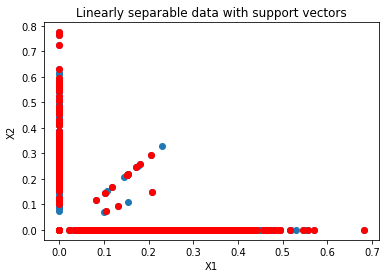

In [ ]:
#visualize https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-visualize-support-vectors-of-your-svm-classifier.md
# Get support vectors themselves
support_vectors = clf.support_vectors_

# Visualize support vectors
plt.scatter(x_train[:,0], x_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
#evaluate SVM
#get predictions from the model
y_predsvm = clf.predict(x_test)

In [ ]:
#accuracy
accuracysvm = accuracy_score(y_test,y_predsvm)
#precision
precisionsvm = precision_score (y_test, y_predsvm, average = "micro")
#recall
recallsvm = recall_score(y_test, y_predsvm, average = "micro")
#f1 score
f1svm = f1_score (y_test,y_predsvm, average = "micro")
print("F1 Score:", f1svm)
print("Recall:", recallsvm)
print("Precision:",  precisionsvm)
print("Accuracy:", accuracysvm)

F1 Score: 0.6581432360742706
Recall: 0.6581432360742706
Precision: 0.6581432360742706
Accuracy: 0.6581432360742706


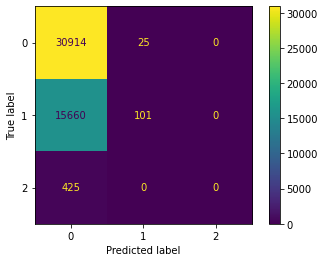

In [ ]:
#confusion matrix
cmsvm = confusion_matrix(y_test,y_predsvm)
ConfusionMatrixDisplay(confusion_matrix = cmsvm).plot()

In [ ]:
#compare to balanced SVM
clfB = SVC(gamma='auto')
clfB.fit(x_train_1, y_train_1)

SVC(gamma='auto')

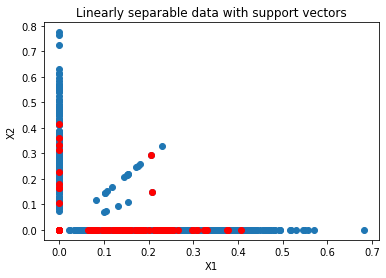

In [ ]:
#visualize
# Get support vectors themselves
support_vectorsB = clfB.support_vectors_

# Visualize support vectors
plt.scatter(x_train[:,0], x_train[:,1])
plt.scatter(support_vectorsB[:,0], support_vectorsB[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
#evaluate SVM
#get predictions from the model
y_predsvmB = clfB.predict(x_test_1)

In [ ]:
#accuracy
accuracysvmB = accuracy_score(y_test_1,y_predsvmB)
#precision
precisionsvmB = precision_score (y_test_1, y_predsvmB, average = "micro")
#recall
recallsvmB = recall_score(y_test_1, y_predsvmB, average = "micro")
#f1 score
f1svmB = f1_score (y_test_1,y_predsvmB, average = "micro")
print("F1 Score:", f1svmB)
print("Recall:", recallsvmB)
print("Precision:",  precisionsvmB)
print("Accuracy:", accuracysvmB)

F1 Score: 0.527843137254902
Recall: 0.527843137254902
Precision: 0.527843137254902
Accuracy: 0.527843137254902


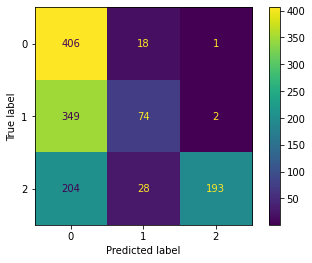

In [ ]:
#confusion matrix
cmsvmB = confusion_matrix(y_test_1,y_predsvmB)
ConfusionMatrixDisplay(confusion_matrix = cmsvmB).plot()

# CNN Convolutional Neural Network

In [ ]:
# https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification
from sklearn.neural_network import MLPClassifier

In [ ]:
clfCNN = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clfCNN.fit(x, y)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [ ]:
# visualize

In [ ]:
#evaluate CNN
#get predictions from the model
y_predCNN = clfCNN.predict(x_test)

In [ ]:
#accuracy
accuracyCNN = accuracy_score(y_test,y_predCNN)
#precision
precisionCNN = precision_score (y_test, y_predCNN, average = "micro")
#recall
recallCNN = recall_score(y_test, y_predCNN, average = "micro")
#f1 score
f1CNN = f1_score (y_test,y_predCNN, average = "micro")
print("F1 Score:", f1CNN)
print("Recall:", recallCNN)
print("Precision:",  precisionCNN)
print("Accuracy:", accuracyCNN)

F1 Score: 0.6565305039787799
Recall: 0.6565305039787799
Precision: 0.6565305039787799
Accuracy: 0.6565305039787799


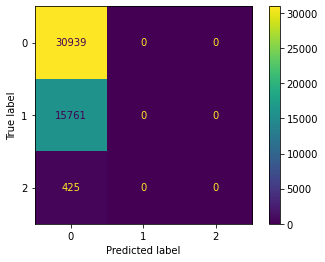

In [ ]:
#confusion matrix
cmCNN = confusion_matrix(y_test,y_predCNN)
ConfusionMatrixDisplay(confusion_matrix = cmCNN).plot()

In [ ]:
#compare to balanced CNN
clfCNNB = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clfCNNB.fit(x, y)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [ ]:
#evaluate CNN balanced
#get predictions from the model
y_predCNNB = clfCNNB.predict(x_test_1)

In [ ]:
#accuracy
accuracyCNNB = accuracy_score(y_test_1,y_predCNNB)
#precision
precisionCNNB = precision_score (y_test_1, y_predCNNB, average = "micro")
#recall
recallCNNB = recall_score(y_test_1, y_predCNNB, average = "micro")
#f1 score
f1CNNB = f1_score (y_test_1,y_predCNNB, average = "micro")
print("F1 Score:", f1CNNB)
print("Recall:", recallCNNB)
print("Precision:",  precisionCNNB)
print("Accuracy:", accuracyCNNB)

F1 Score: 0.3333333333333333
Recall: 0.3333333333333333
Precision: 0.3333333333333333
Accuracy: 0.3333333333333333


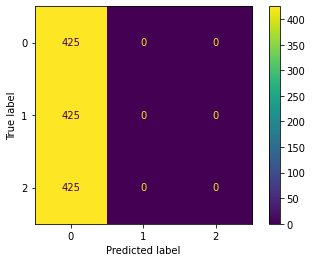

In [ ]:
#confusion matrix
cmCNNB = confusion_matrix(y_test_1,y_predCNNB)
ConfusionMatrixDisplay(confusion_matrix = cmCNNB).plot()

# Naive Bayes

In [ ]:
# https://www.datacamp.com/tutorial/naive-bayes-scikit-learn
#naive bayes
from sklearn.naive_bayes import GaussianNB

In [ ]:
#declare and fit model to data
nbmodel = GaussianNB()
nbmodel.fit(x_train, y_train)

GaussianNB()

In [ ]:
#evaluate
y_predNB = nbmodel.predict(x_test)

In [ ]:
#accuracy
accuracyNB = accuracy_score(y_test,y_predNB)
#precision
precisionNB = precision_score (y_test, y_predNB, average = "micro")
#recall
recallNB = recall_score(y_test, y_predNB, average = "micro")
#f1 score
f1NB = f1_score (y_test,y_predNB, average = "micro")
print("F1 Score:", f1NB)
print("Recall:", recallNB)
print("Precision:",  precisionNB)
print("Accuracy:", accuracyNB)

F1 Score: 0.3339628647214854
Recall: 0.3339628647214854
Precision: 0.3339628647214854
Accuracy: 0.3339628647214854


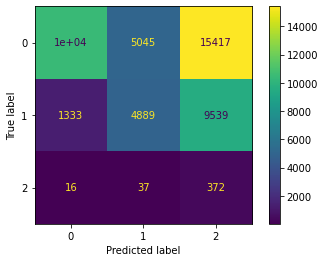

In [ ]:
#confusion matrix
cmNB = confusion_matrix(y_test,y_predNB)
ConfusionMatrixDisplay(confusion_matrix = cmNB).plot()

In [ ]:
#compare to balanced data
nbmodelB = GaussianNB()
nbmodelB.fit(x_train_1, y_train_1)

GaussianNB()

In [ ]:
#evaluate
y_predNBB = nbmodelB.predict(x_test_1)

In [ ]:
#accuracy
accuracyNBB = accuracy_score(y_test_1,y_predNBB)
#precision
precisionNBB = precision_score (y_test_1, y_predNBB, average = "micro")
#recall
recallNBB = recall_score(y_test_1, y_predNBB, average = "micro")
#f1 score
f1NBB = f1_score (y_test_1,y_predNBB, average = "micro")
print("F1 Score:", f1NBB)
print("Recall:", recallNBB)
print("Precision:",  precisionNBB)
print("Accuracy:", accuracyNBB)

F1 Score: 0.5113725490196078
Recall: 0.5113725490196078
Precision: 0.5113725490196078
Accuracy: 0.5113725490196078


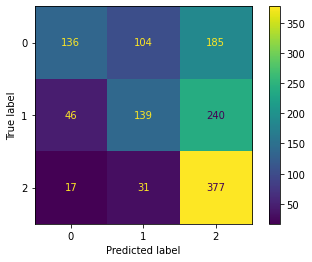

In [ ]:
#confusion matrix
cmNBB = confusion_matrix(y_test_1,y_predNBB)
ConfusionMatrixDisplay(confusion_matrix = cmNBB).plot()